### Human activity recognition using smartphone
### installing required libraries

In [ ]:
!pip install umap-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import wget
from sklearn.cluster import DBSCAN, KMeans
from sklearn.manifold import TSNE
sns.set()
current_palette = sns.color_palette()
from matplotlib import pyplot as plt
import umap.umap_ as umap
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import time
import warnings
warnings.filterwarnings('ignore')

### Fetching data and processing

In [ ]:
label = pd.read_csv("https://raw.githubusercontent.com/Sunnycse10/datahouse/main/labels.txt", header=None)
label

,0
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [ ]:
activity = pd.read_csv("https://raw.githubusercontent.com/Sunnycse10/datahouse/main/activity_labels.txt", header= None,sep=' ')
act = activity.set_index(0).to_dict()[1]
for i,j in act.items():
  label.loc[label[0]==i, 'Activity']=j
label.columns=['label','Activity']
label

,label,Activity
0,5,STANDING
1,5,STANDING
2,5,STANDING
3,5,STANDING
4,5,STANDING
...,...,...
7347,2,WALKING_UPSTAIRS
7348,2,WALKING_UPSTAIRS
7349,2,WALKING_UPSTAIRS
7350,2,WALKING_UPSTAIRS


In [ ]:
features = pd.read_csv("https://raw.githubusercontent.com/Sunnycse10/datahouse/main/data2.txt",  header=None, delim_whitespace=True)
features

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [ ]:
feature_names = pd.read_csv("https://raw.githubusercontent.com/Sunnycse10/datahouse/main/features.txt", header=None,sep=' ')
dataset = features
dataset.columns = list(feature_names[1])
dataset

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [ ]:
features.info()
print(f"There are {features.isnull().any().sum()}  null values in the dataset")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
There are 0  null values in the dataset


In [ ]:
print(f"Number of features: {len(feature_names[1])}")
print(f"Number of unique features: {feature_names[1].nunique()}")
similar_features =[]
for i in range(len(feature_names[1].value_counts())):
  if feature_names[1].value_counts()[i]>1:
    similar_features.append(feature_names[1].value_counts().index[i])
print(similar_features)
dataset[similar_features[0]].head()

Number of features: 561
Number of unique features: 477
['fBodyAccJerk-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyGyro-bandsEnergy()-1,8', 'fBodyGyro-bandsEnergy()-9,16', 'fBodyGyro-bandsEnergy()-17,24', 'fBodyGyro-bandsEnergy()-25,32', 'fBodyGyro-bandsEnergy()-33,40', 'fBodyGyro-bandsEnergy()-41,48', 'fBodyGyro-bandsEnergy()-49,56', 'fBodyGyro-bandsEnergy()-1,16', 'fBodyGyro-bandsEnergy()-17,32', 'fBodyGyro-bandsEnergy()-33,48', 'fBodyGyro-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyGyro-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAccJerk-bandsEnergy()-1,8', 'fBodyAccJerk-bandsEnergy()-9,16', 'fBodyAccJerk-bandsEnergy()-17,24', 'fBodyAccJerk-bandsEnergy()-25,32', 'fBodyAccJerk-bandsEnergy()-33,40', 'fBodyAccJerk-bandsEner

,"fBodyAccJerk-bandsEnergy()-41,48","fBodyAccJerk-bandsEnergy()-41,48","fBodyAccJerk-bandsEnergy()-41,48"
0,-0.999640,-0.999729,-0.999814
1,-0.999814,-0.999685,-0.999769
2,-0.999906,-0.999627,-0.999626
3,-0.999930,-0.999846,-0.999735
4,-0.999929,-0.999769,-0.999688


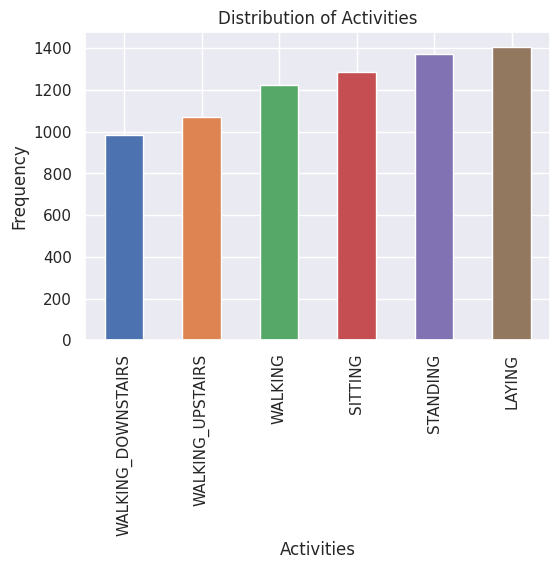

In [ ]:
#Visualizing the distribution of various activities
fig,ax = plt.subplots(figsize =(6, 4))
label['Activity'].value_counts().sort_values().plot(kind = 'bar', color = current_palette)
ax.set_xlabel('Activities')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Activities')
plt.show()



Using umap for dimensionality reduction

In [ ]:
#Visualizing the clusters
dm = umap.UMAP(min_dist=0.3,random_state=123, n_components=3)
embedding = dm.fit_transform(features)
embedding = pd.DataFrame(embedding)


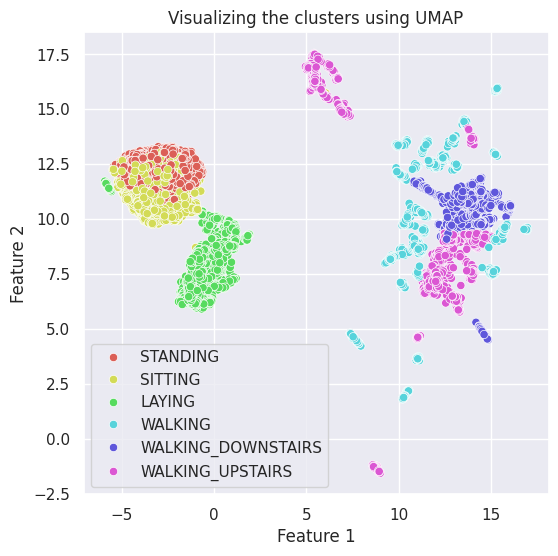

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=embedding[0], y=embedding[1], hue=label.Activity.tolist(),
                palette=sns.color_palette("hls", 6), ax=ax)
ax.set_title('Visualizing the clusters using UMAP')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()

### K means clustering without dimensionality reduction

In [ ]:
k = 6  # using 6 clusters
# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

KMeans(n_clusters=6, random_state=42)

6


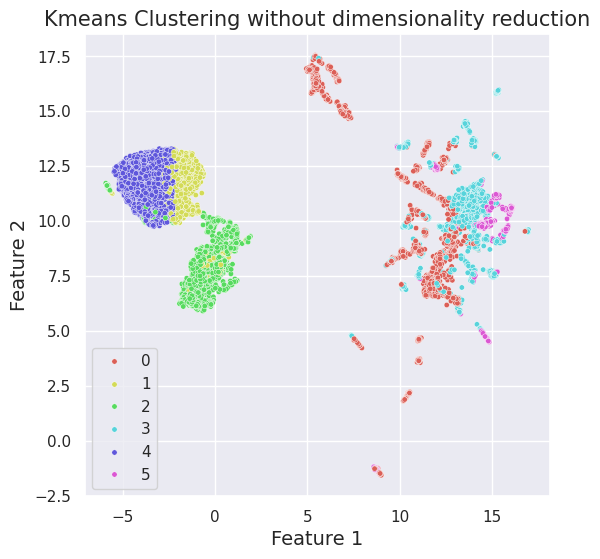

In [ ]:
# Get cluster labels
cluster_labels = kmeans.labels_
print((int)(pd.DataFrame(cluster_labels).nunique()))
plt.figure(figsize=(6,6))
sns.scatterplot(x=embedding[0], y=embedding[1], hue=kmeans.labels_,
                    palette=sns.color_palette("hls", len(pd.unique(kmeans.labels_))), s=15)
plt.title('Kmeans Clustering without dimensionality reduction',fontsize=15)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

### K means clustering with dimensionality reduction

6


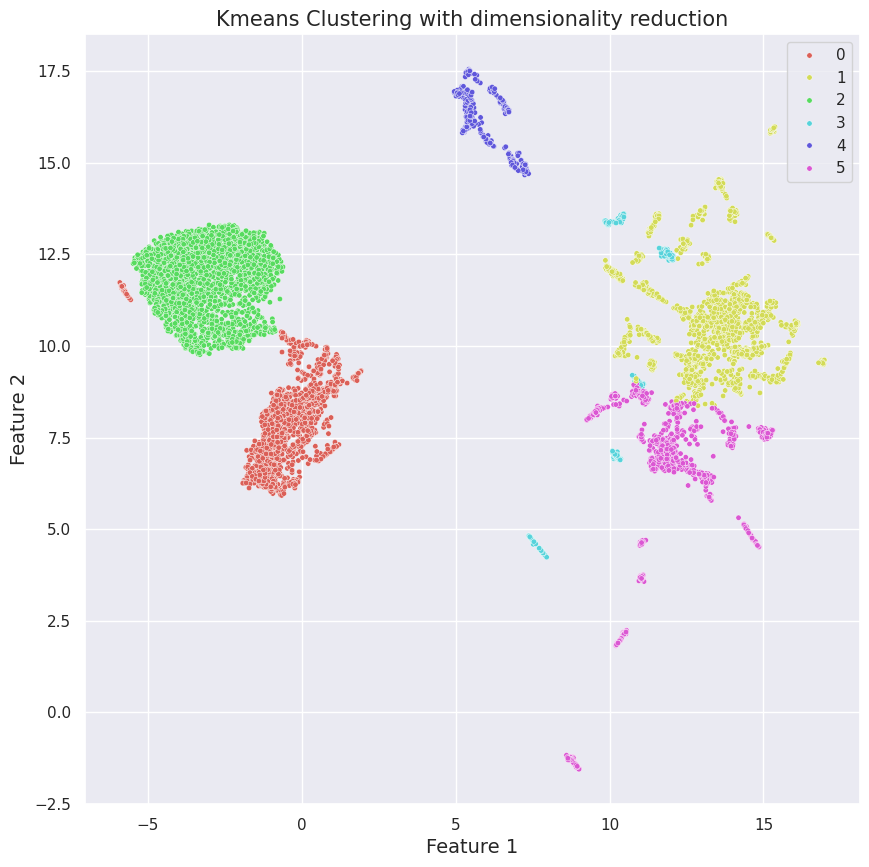

In [ ]:
k = 6  # using 6 clusters
# Apply KMeans clustering
kmeans2 = KMeans(n_clusters=k, random_state=42)
kmeans2.fit(embedding)
# Get cluster labels
cluster_labels = kmeans2.labels_
print((int)(pd.DataFrame(cluster_labels).nunique()))
plt.figure(figsize=(10,10))
sns.scatterplot(x=embedding[0], y=embedding[1], hue=kmeans2.labels_,
                    palette=sns.color_palette("hls", len(pd.unique(kmeans2.labels_))), s=15)
plt.title('Kmeans Clustering with dimensionality reduction',fontsize=15)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

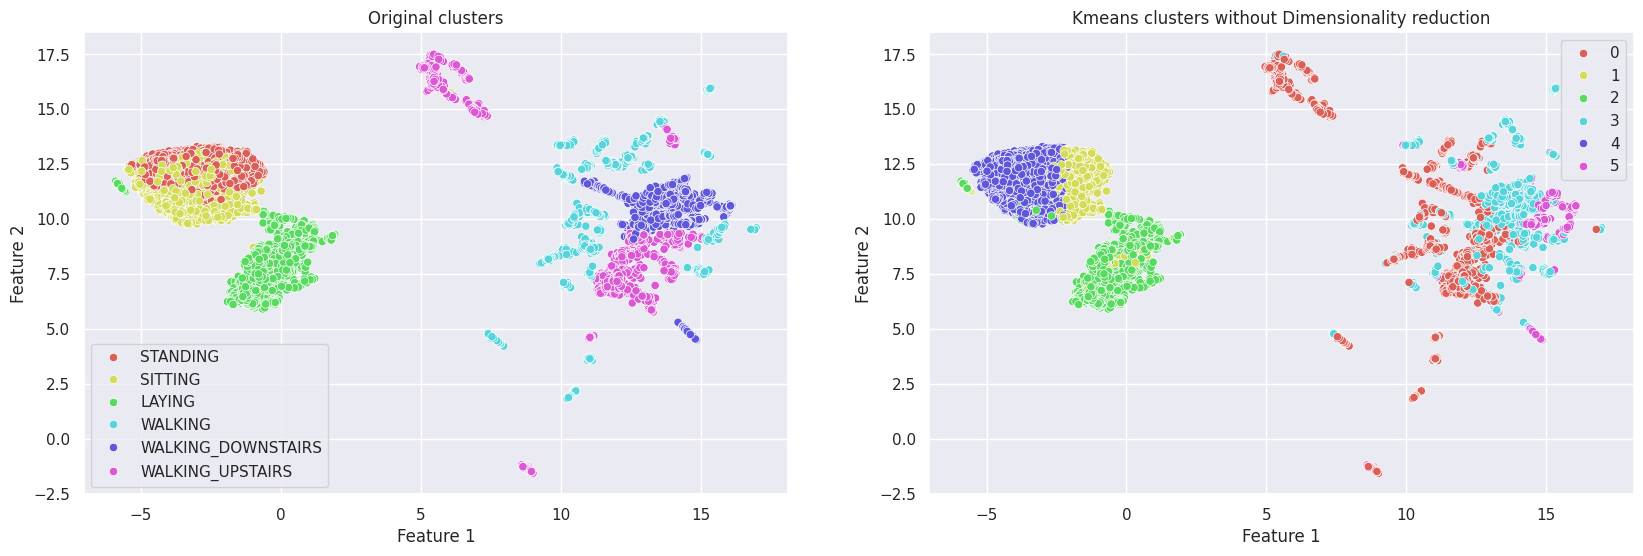

In [ ]:
#comparing original clusters with model (without Dimensionality reduction)
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,6)
sns.scatterplot(x=embedding[0], y=embedding[1], hue=label.Activity.tolist(),palette=sns.color_palette("hls", 6),ax=ax[0])
ax[0].set_title("Original clusters")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

sns.scatterplot(x=embedding[0], y=embedding[1], hue=kmeans.labels_,
                    palette=sns.color_palette("hls", len(pd.unique(kmeans.labels_))), ax=ax[1])
ax[1].set_title("Kmeans clusters without Dimensionality reduction")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
plt.show()

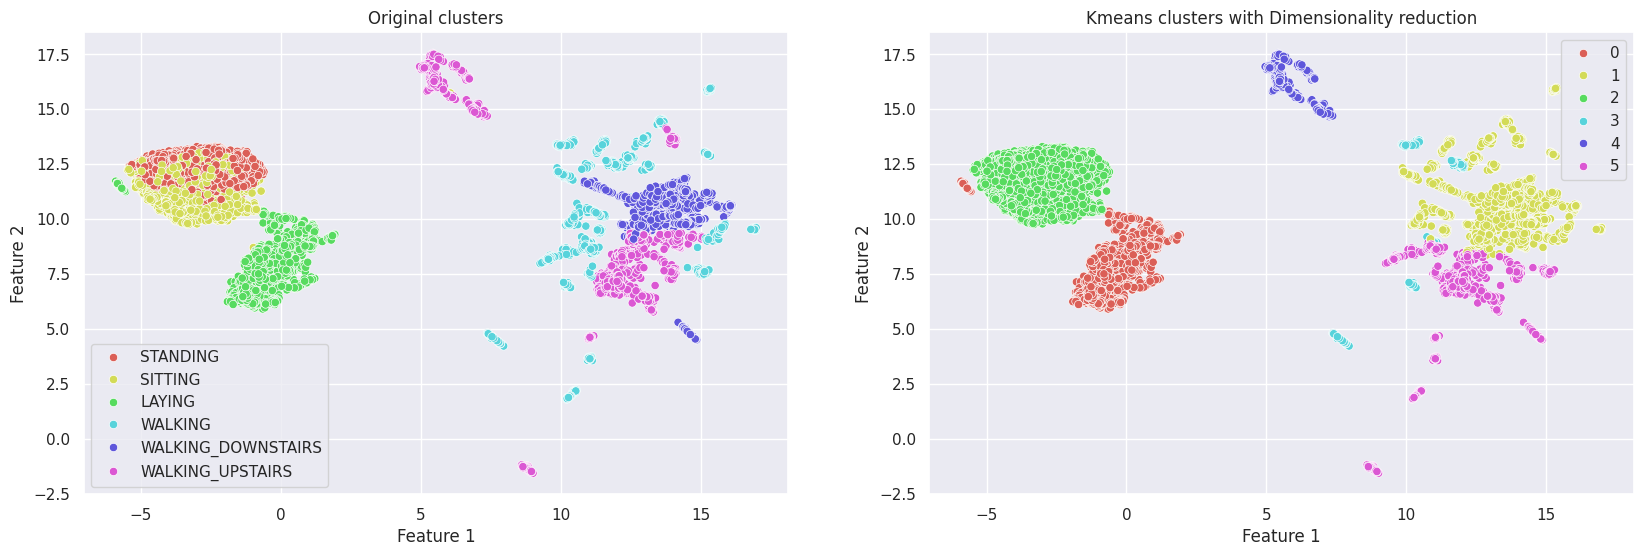

In [ ]:
#comparing original clusters with model with Dimensionality reduction
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,6)
sns.scatterplot(x=embedding[0], y=embedding[1], hue=label.Activity.tolist(),palette=sns.color_palette("hls", 6),ax=ax[0])
ax[0].set_title("Original clusters")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

sns.scatterplot(x=embedding[0], y=embedding[1], hue=kmeans2.labels_,
                    palette=sns.color_palette("hls", len(pd.unique(kmeans2.labels_))), ax=ax[1])
ax[1].set_title("Kmeans clusters with Dimensionality reduction")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
plt.show()

In [ ]:
#Function for visualing DBSCAN clusters
def visualize(data, labels):
  plt.figure(figsize=(6,6))
  sns.scatterplot(x=data[0], y=data[1], hue=labels,
                    palette=sns.color_palette("hls", len(pd.unique(labels))), s=15)
  plt.title('DBSCAN Clustering',fontsize=14)
  plt.xlabel('Feature 1',fontsize=10)
  plt.ylabel('Feature 2',fontsize=10)
  plt.show()

In [ ]:
# Function for plotting k-distance graph
def parameter_tuning(data):
  neigh = NearestNeighbors(n_neighbors=2)
  nbrs = neigh.fit(data)
  distances, indices = nbrs.kneighbors(data)

  # Plotting K-distance Graph
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.figure(figsize=(6,6))
  plt.plot(distances)
  plt.title('K-distance Graph',fontsize=10)
  plt.xlabel('Data Points sorted by distance',fontsize=8)
  plt.ylabel('Epsilon',fontsize=8)
  plt.show()


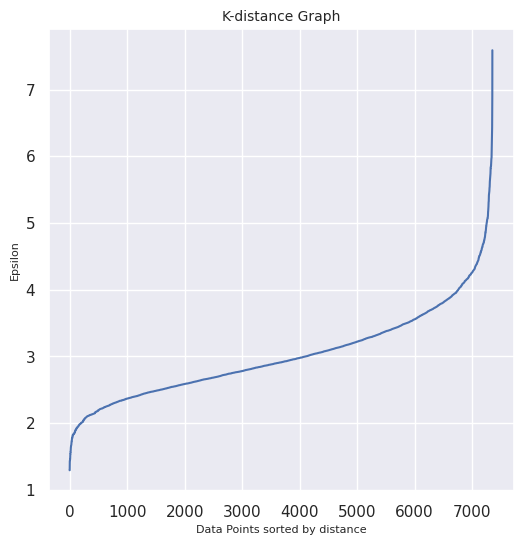

In [ ]:
#Finding the best epsilon value
parameter_tuning(features)

### DBSCAN without dimensionality reduction

Number of clusters formed :  3


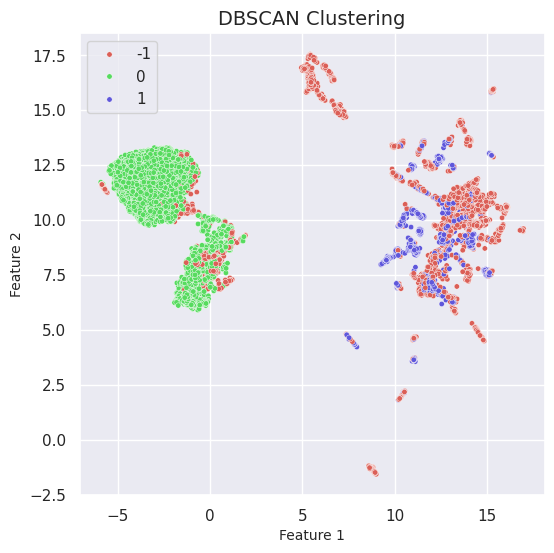

In [ ]:
#Fitting the model with best paramters
start = time.perf_counter()
model1=DBSCAN(eps=5,min_samples=1000)
model1.fit(features)
end = time.perf_counter()
without_dr = end -start
print("Number of clusters formed : ",(int)(pd.DataFrame(model1.labels_).nunique()))
visualize(embedding,model1.labels_)

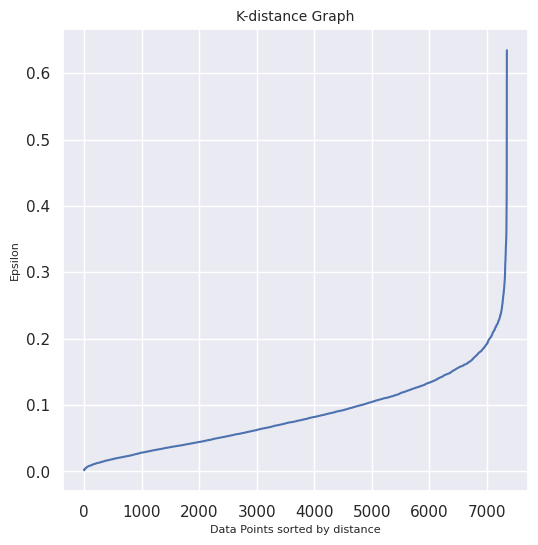

In [ ]:
#Finding the best epsilon value for reduced data
parameter_tuning(embedding)

### DBSCAN with dimensionality reduction

Number of clusters formed :  6


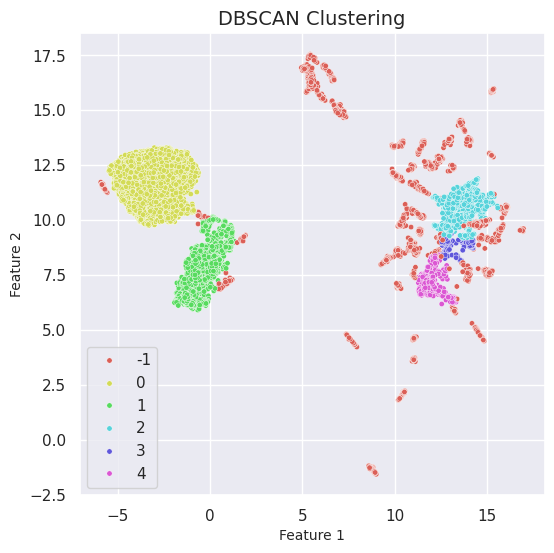

In [ ]:
#Fitting the model with best paramters
start = time.perf_counter()
model2=DBSCAN(eps=1,min_samples=179)
model2.fit(embedding)
end = time.perf_counter()
with_dr = end-start
print("Number of clusters formed : ",(int)(pd.DataFrame(model2.labels_).nunique()))
visualize(embedding,model2.labels_)

Time taken for clustering without dimensionality reduction:  2.12  seconds
Time taken for clustering with dimensionality reduction:  0.12  seconds


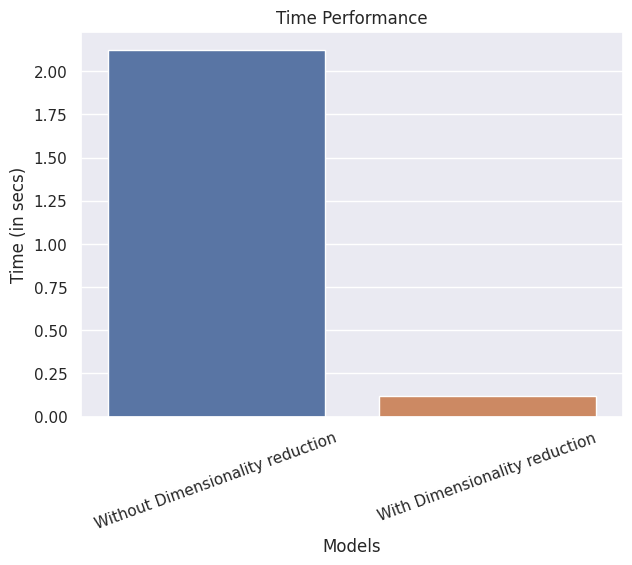

In [ ]:
#Comparing the performnce of model with dimensional reduction and model without dimensional reduction
print('Time taken for clustering without dimensionality reduction: ',round(without_dr,2),' seconds')
print('Time taken for clustering with dimensionality reduction: ',round(with_dr,2),' seconds')

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=['Without Dimensionality reduction','With Dimensionality reduction'],y=[without_dr,with_dr],palette=current_palette)
ax.set_xticklabels(['Without Dimensionality reduction','With Dimensionality reduction'], rotation= 20)
ax.set_title('Time Performance')
ax.set_xlabel('Models')
ax.set_ylabel('Time (in secs)')
plt.show()

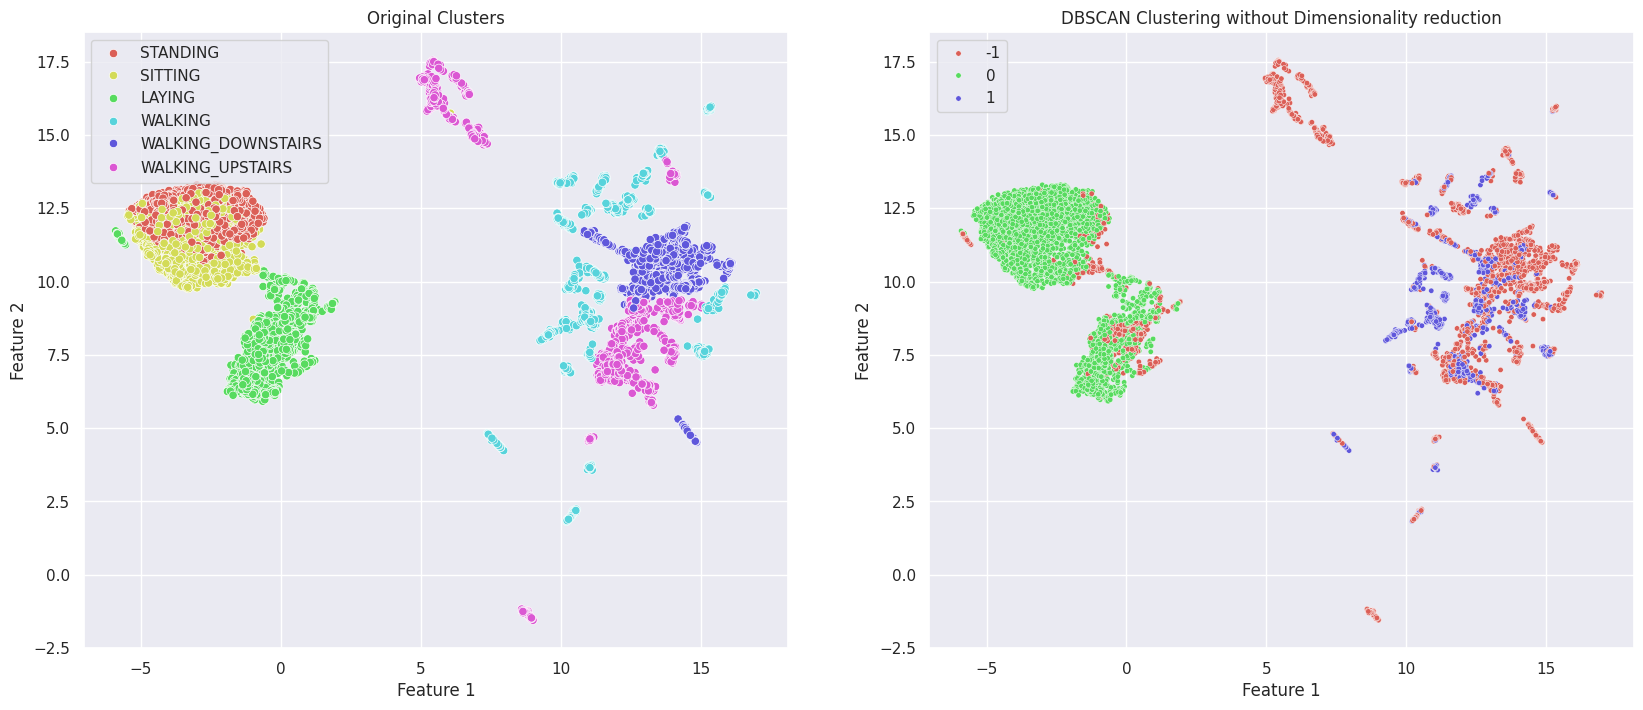

In [ ]:

#comparing original clusters with model (without Dimensionality reduction)

fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,8)
sns.scatterplot(x=embedding[0], y=embedding[1],hue=label.Activity.tolist(),
                palette=sns.color_palette("hls", 6),ax=ax[0])
ax[0].set_title('Original Clusters')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

sns.scatterplot(x=embedding[0], y=embedding[1],hue=model1.labels_,
                palette=sns.color_palette("hls", (int)(pd.DataFrame(model1.labels_).nunique())),s=15)

ax[1].set_title('DBSCAN Clustering without Dimensionality reduction')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
plt.show()

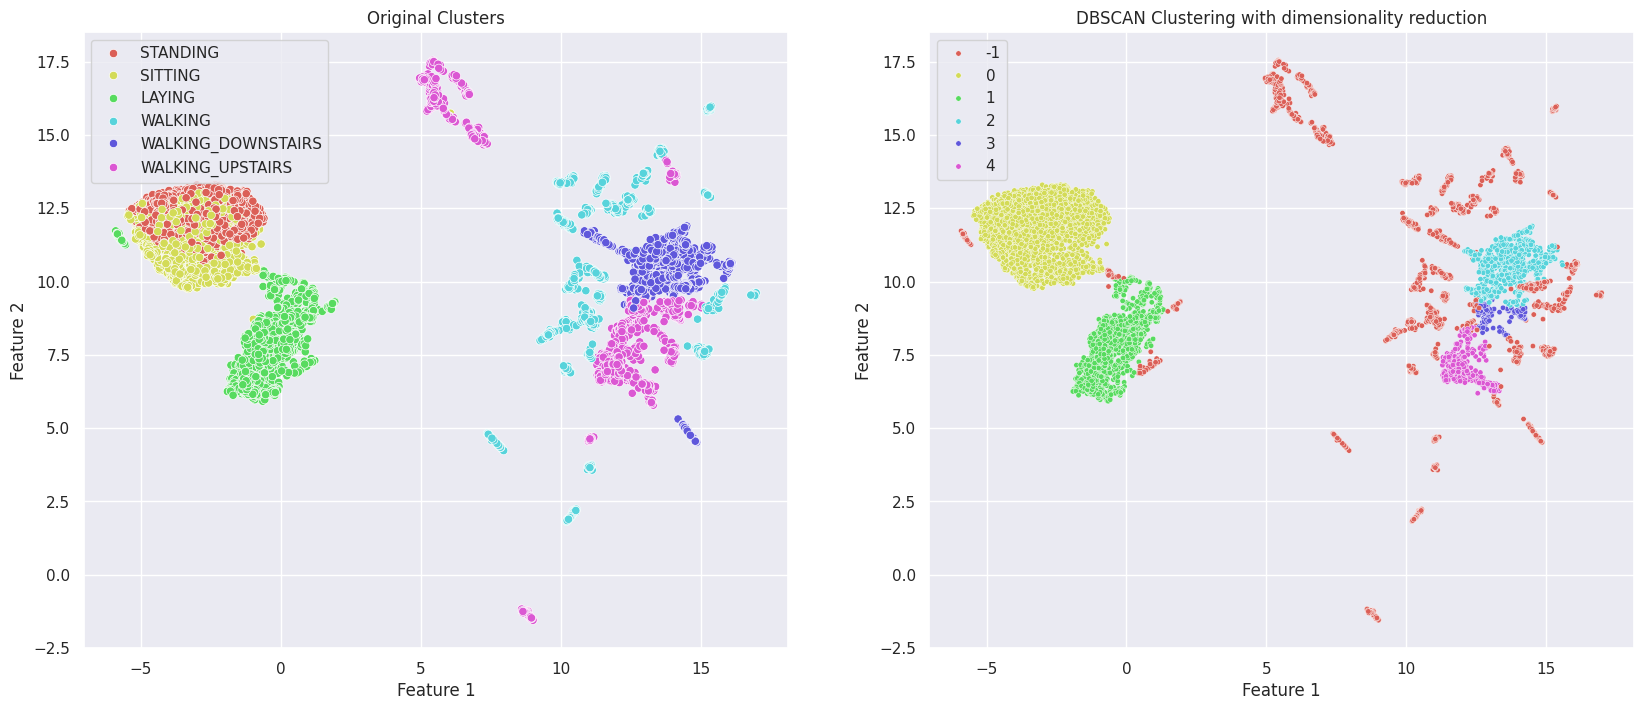

In [ ]:

#comparing original clusters with model ( with Dimensionality reduction)

fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,8)
sns.scatterplot(x=embedding[0], y=embedding[1],hue=label.Activity.tolist(),
                palette=sns.color_palette("hls", 6),ax=ax[0])
ax[0].set_title('Original Clusters')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

sns.scatterplot(x=embedding[0], y=embedding[1],hue=model2.labels_,
                palette=sns.color_palette("hls", (int)(pd.DataFrame(model2.labels_).nunique())),s=15)

ax[1].set_title('DBSCAN Clustering with dimensionality reduction')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')
plt.show()
